## Auto Insurance Claims Prediction

### Predict if a customer was in a car crash or not i.e. predict 'TARGET_FLAG' column

Name : Sai Sandeep Sharma CHITTILLA

Email : sharma.sandeepch@gmail.com

Github : https://github.com/sharma-sandeepch?tab=repositories

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_auto = 'auto-insurance-fall-2017/train_auto.csv'
test_auto = 'auto-insurance-fall-2017/test_auto.csv'

In [4]:
df_train = pd.read_csv(train_auto)
df_test = pd.read_csv(test_auto)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   float64
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   object 
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   object 
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   object 
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

In [6]:
df_train['INDEX'].unique().shape[0]

8161

Observations : 

1. We have 8161 entries with unique INDEX ids

2. Columns with nulls : AGE, YOJ, INCOME, HOME_VAL, JOB, CAR_AGE
    We will impute these columns later in the notebook

In [7]:
df_train.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [8]:
# Cleaning operations on the columns 

# Columns corresponding to money have '$' and ',' 
# We Remove them from these columns and convert the column to float

dollar_cols = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']

df_train[dollar_cols] = df_train[dollar_cols].apply(lambda x : x.str.replace(',','').str.strip('$'))
df_train[dollar_cols] = df_train[dollar_cols].astype('float')

df_test[dollar_cols] = df_test[dollar_cols].apply(lambda x : x.str.replace(',','').str.strip('$'))
df_test[dollar_cols] = df_test[dollar_cols].astype('float')

In [9]:
# Identifying different column types so it becomes easy to handle them later

target = 'TARGET_FLAG'
target_amt = 'TARGET_AMT' # we are not concerned with this variable for this case

index = 'INDEX'

continuous_cols = ['AGE', 'KIDSDRIV', 'HOMEKIDS', 'YOJ', 'TRAVTIME', 'TIF', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE']
continuous_cols.extend(dollar_cols)

categorical_cols = ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 
                    'REVOKED', 'URBANICITY']

In [10]:
# checking for duplicate records
# There seem to be no duplicates in Train and Test

print('Duplicates in training : ', df_train[df_train.duplicated(keep='first')].shape[0])
print('Duplcates in test : ', df_test[df_test.duplicated(keep='first')].shape[0])

Duplicates in training :  0
Duplcates in test :  0


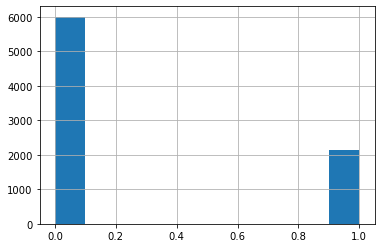

Percentage of claims (TARGET_FLAG = 1): 26.38%


In [11]:
# Checking distribution of claim vs no claim in training data

fig = df_train['TARGET_FLAG'].hist()
plt.show()

print(f"Percentage of claims (TARGET_FLAG = 1): {df_train[df_train['TARGET_FLAG']==1].TARGET_FLAG.count()/len(df_train.index):.2%}")

Observation :


1. Approximately 75% of the entries have no claim as opposed to 25% who do. So, predicting a no claim ALWAYS would yield a 75% accuracy.


2. Slightly Imbalanced

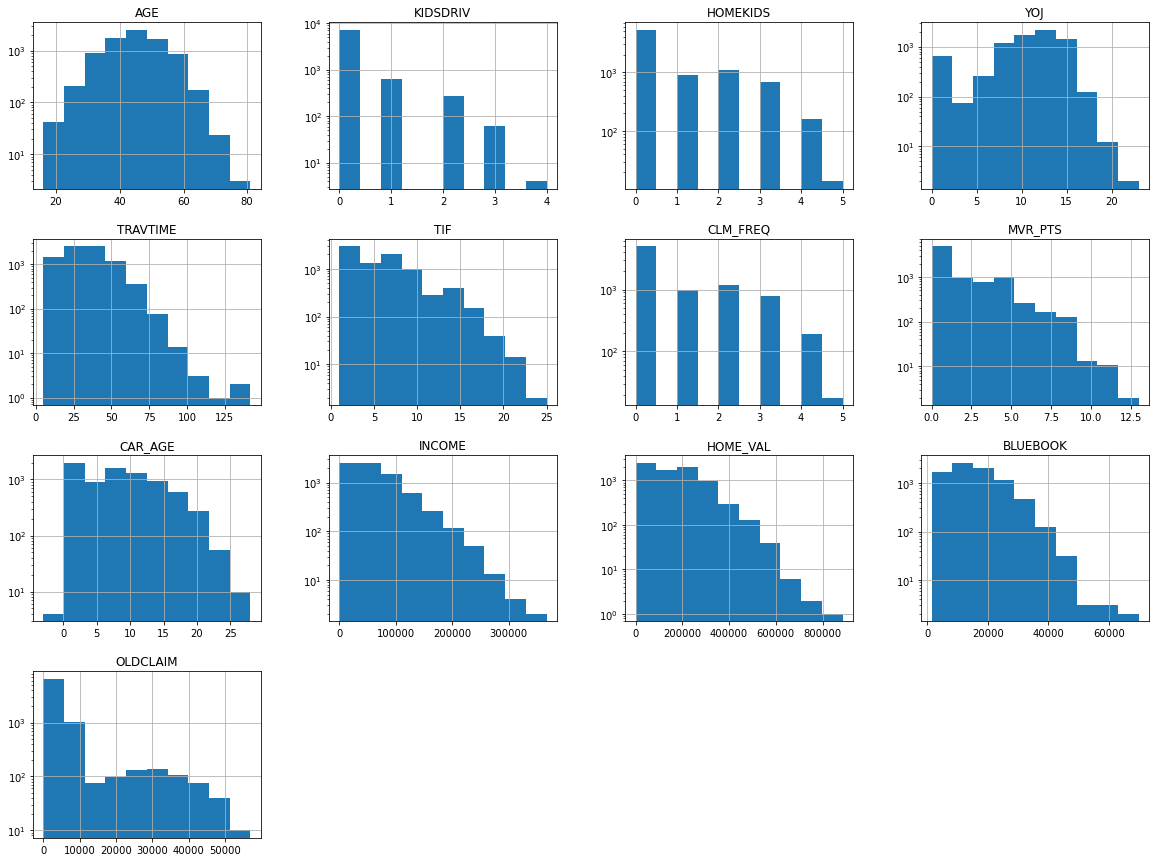

In [12]:
# Visualizing continuous variables


fig = df_train[continuous_cols].hist(figsize=[20,15],log='false')
plt.show()

Observations :

1. Age is normally distributed as we would expect. We can bin ages into : 20-40, 41-60, 61+
2. KIDSDRIVING has many 0s (almost an entire order) so we can create a binary feature here whether kids drive or not
3. HOMEKIDS can also be converted to a binary feature (0 if no kids at home, 1 otherwise)
4. YOJ is slmost normally distributed but has few 0s which are probably new people
5. Several variables which are right skewed so maybe we could log transform these columns
6. CAR_AGE has a weird negative value. Probably we could drop this record
7. HOME_VAL has lots of 0s. Maybe we could create an additional Binary feature for those with HOME_VAL > 0 (Assuming that those with 0 value, do not own homes)
8. OLDCLAIM has 0s as well and is probably correlated to CLM_FREQ. Still we could create a new binary flag to indicate whetehr the customer has had a previous claim or not
9. MVR_PTS is a Motor Vehicle Records system that can indicate risk level of customers. From https://www.wnins.com/losscontrolbulletins/MVREvaluation.pdf we can group them into categories :
    1-3 LowRisk
    4-5 MinorRisk
    6-7 BorderLineRisk
    8-9 MediumRisk
    10+ HighRisk

In [13]:
# This function is used to get the '%' for different on top of the bars in the countplot
# I use this when seperating the Crash(TARGET_FLAG=1) vs No-Crash(TARGET_FLAG=0) 
# and visualizing other features

def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [0 if np.isnan(p.get_height()) else p.get_height() for p in plot.patches]
#     print(a)
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 

            plot.annotate(percentage, (x, y), size = 12)

					Categorical Features


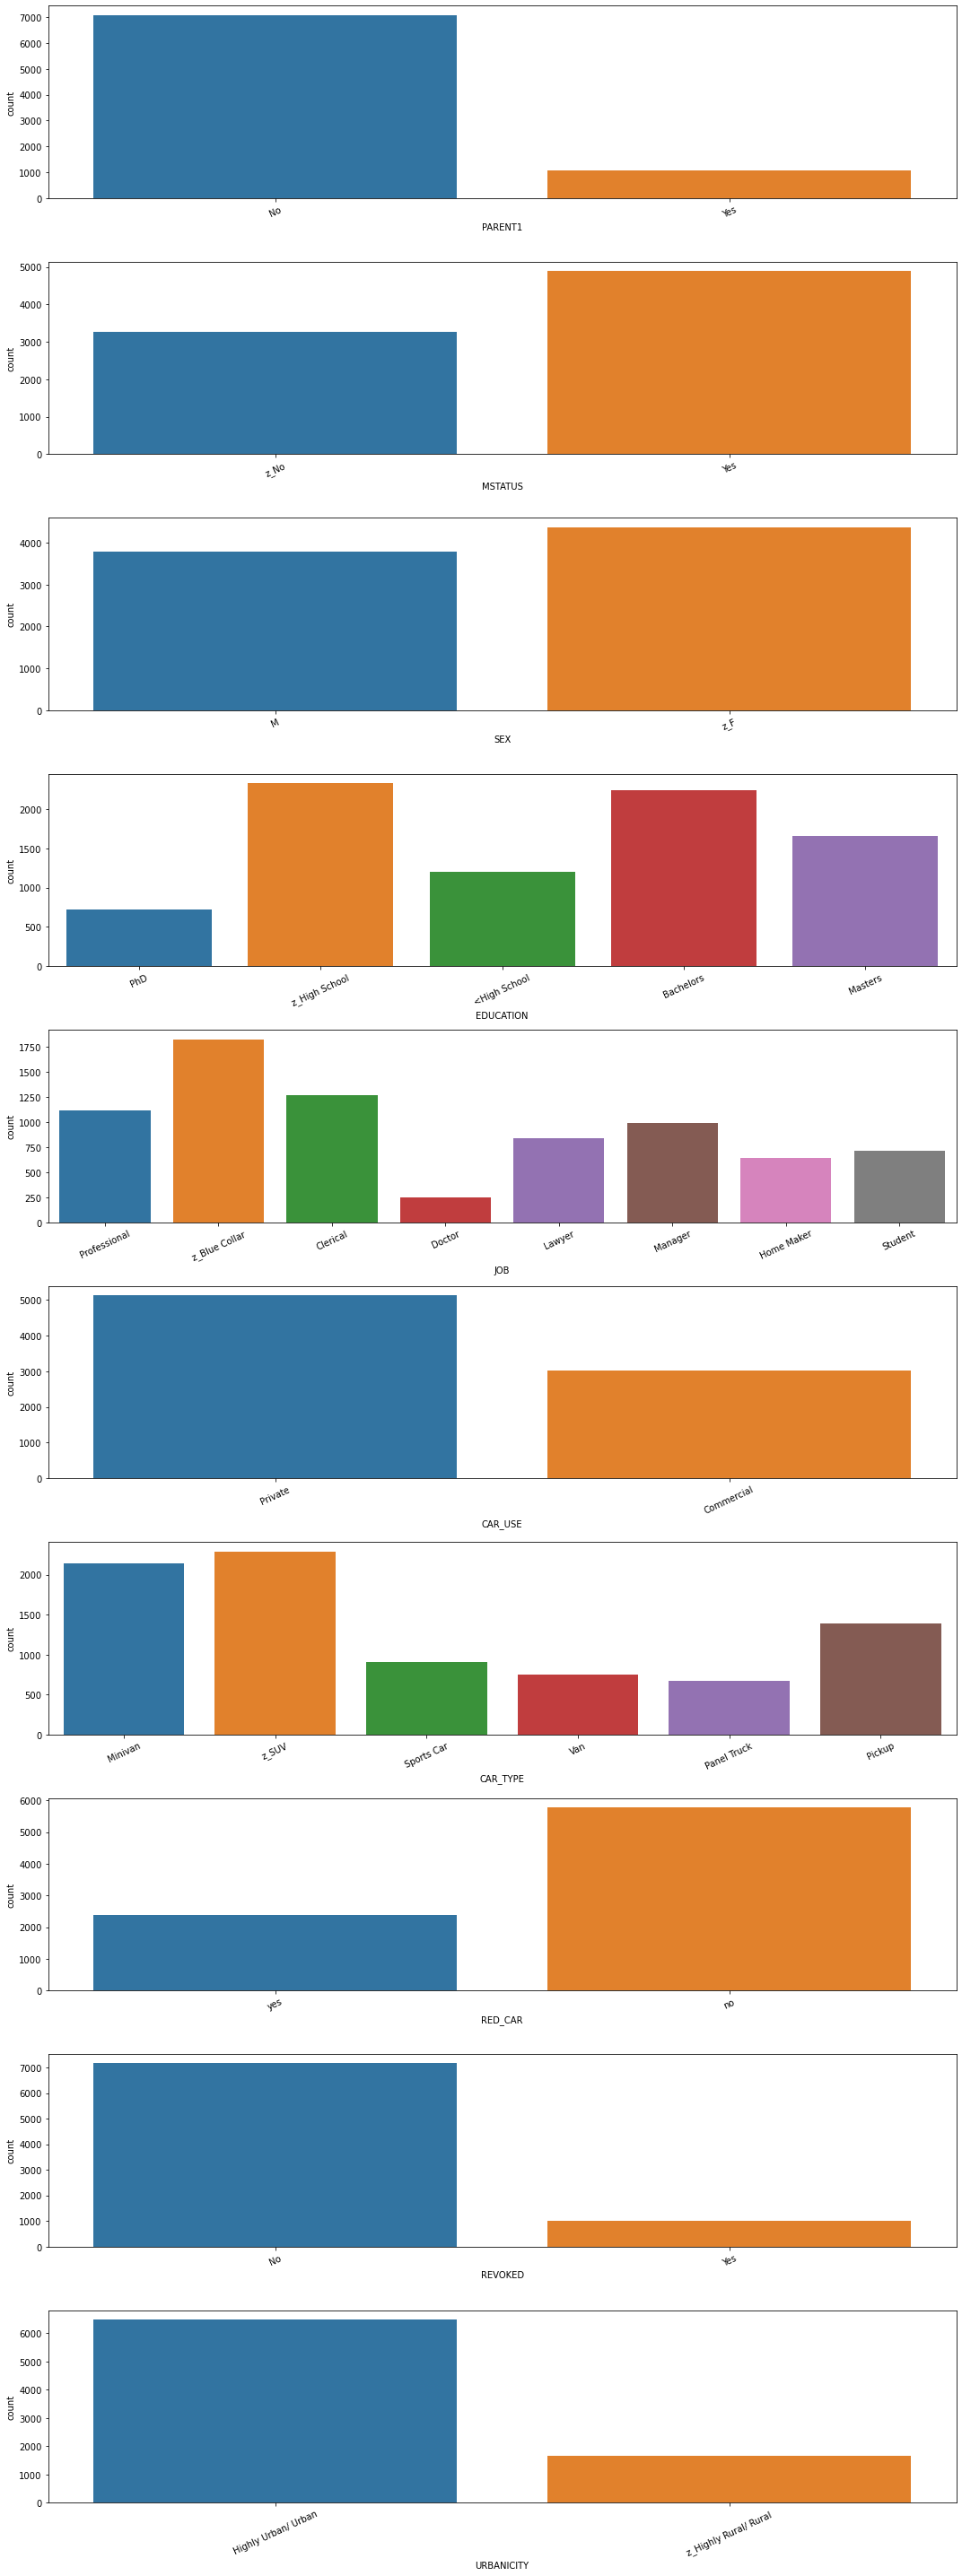

In [14]:
# Visualizing Categorical Variables

fig, axes = plt.subplots(10, 1, figsize=(15, 40))
axes = axes.flatten()

print('\t\t\t\t\tCategorical Features')

for ax, y in zip(axes, categorical_cols):
    plt.setp(ax.get_xticklabels(), rotation=25)
    sns.countplot(y, data=df_train, ax=ax)

plt.tight_layout()  
plt.show()

In [15]:
# Replace '<High School' with 'No High School' to remove the < sign

df_train['EDUCATION'] = df_train['EDUCATION'].replace('<High School', 'No High School')
df_test['EDUCATION'] = df_test['EDUCATION'].replace('<High School', 'No High School')

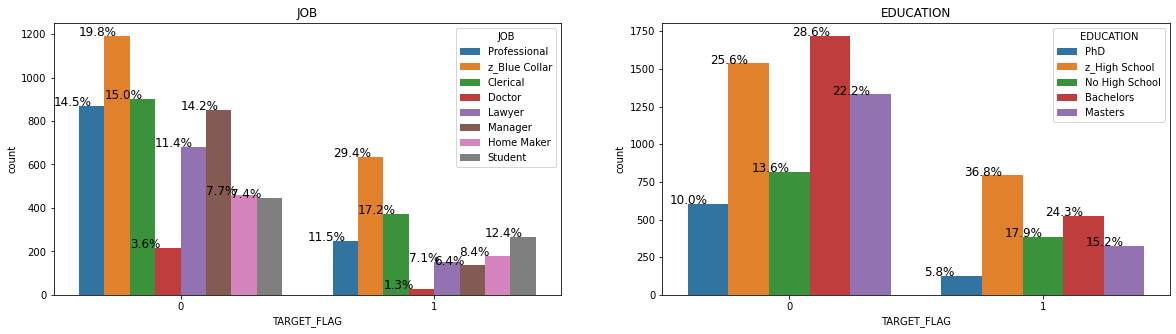

In [16]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))

axes[0].set_title('JOB')
sns.countplot("TARGET_FLAG", hue='JOB', data=df_train, ax=axes[0])
with_hue(axes[0], df_train['TARGET_FLAG'], 2, 8)

axes[1].set_title('EDUCATION')
sns.countplot("TARGET_FLAG", hue='EDUCATION', data=df_train, ax=axes[1])
with_hue(axes[1], df_train['TARGET_FLAG'], 2, 5)

plt.show()

Observations (from the cells above) :

1. PARENT1, MSTATUS, SEX, RED_CAR, REVOKED are binary features (YES/NO)
    - Around 12% of people have single parent
    - Around 60% of people are married
    - We have almost equal distribution of males and females
    - Surprisingly, 25% of the populaiton has a red car
    - About 12% of the people had their license revoked prior
    
2. It is interesting to see from below that - there are higher percentage of people with JOBS : BlueCollar, HomeMaker, Clerical and Student with a crash than there are in without a crash. The opposite is true for people with JOBS : Professional, Doctor, Lawyer and Manager.

    We can create a binary feature 'PROFESSIONAL' with 1 if JOB is Professional, Doctor, Lawyer and Manager and 0 otherwise


3. Similarly there are higher percentage of people with a HighSchool degree and in a crash than without. Again the opposite is true for those holding degrees like : PhD, Masters, Bachelors


    We can create a binary feature 'HIGHLY_EDUCATED' = 1 if Education is PhD, Masters, Bachelors and 0 otherwise

In [17]:
# Checking to see if test data has any new values unseen in training data
# So all the different "Levels" of values in categorical columns of Test data have been encountered
# in Training already.

# This makes it easy for us to perform transformations later on

for i in categorical_cols:
    if df_test[i].isin(df_train[i]).min()==0:
        print(i,':\t\tUnseen values in Test')
    else:
        print(i,':\t\tNo new values in Test Data')        

PARENT1 :		No new values in Test Data
MSTATUS :		No new values in Test Data
SEX :		No new values in Test Data
EDUCATION :		No new values in Test Data
JOB :		No new values in Test Data
CAR_USE :		No new values in Test Data
CAR_TYPE :		No new values in Test Data
RED_CAR :		No new values in Test Data
REVOKED :		No new values in Test Data
URBANICITY :		No new values in Test Data


# Correlations

In our case, the target variable is a dichotnous

In [18]:
from scipy.stats import pointbiserialr, chi2_contingency
from collections import defaultdict

In [19]:
# correlation b/w continuous and dichotomous target

pb_corrs = defaultdict()

for i in continuous_cols:
    pbc = pointbiserialr(df_train[i].dropna(), df_train.dropna(subset=[i])[target])
    pb_corrs[i] = pbc[0]
    
corr_df = pd.DataFrame.from_dict(pb_corrs, orient="index", columns=['correlation'])

corr_df.sort_values(by='correlation')

,correlation
HOME_VAL,-0.183737
INCOME,-0.142008
BLUEBOOK,-0.103383
AGE,-0.103217
CAR_AGE,-0.100651
TIF,-0.082370
YOJ,-0.070512
TRAVTIME,0.048368
KIDSDRIV,0.103668
HOMEKIDS,0.115621


### Observations :
    
1. We can see that HOME_VAL, INCOME, BLUEBOOK are negatively correalted with the TARGET_FLAG implying people with higher values for these variables are associated with less likeliness to crash 


2. Whereas those people with higher MVR_PTS, CLM_FREQ and OLDCLAIM are associated with higher likeliness to crash.


Similarly we can see how other continous variables are correlated to Crashing. 

All these correlations seem to have very small p-values

In [20]:
# NEXT, we do a chi2 test for independence with : 
# H0 : Variables are independent
# H1 : Variables are dependent

chi2_stats = defaultdict()

for i in categorical_cols:
    contingency_tab = pd.crosstab(df_train[i], df_train[target]) 
    chi2_, p_val, _, _ = chi2_contingency(contingency_tab)
    chi2_stats[i] = (chi2_, p_val)
    
chi2_corr_df = pd.DataFrame.from_dict(chi2_stats, orient='index', columns=['chi2_statistic', 'p_value'])
chi2_corr_df.sort_values(by='p_value')

,chi2_statistic,p_value
URBANICITY,409.143715,5.630126e-91
JOB,260.754161,1.421423e-52
PARENT1,201.702752,8.876894e-46
REVOKED,187.350671,1.204046e-42
CAR_USE,165.454063,7.279839e-38
EDUCATION,170.261938,9.188600e-36
CAR_TYPE,170.384514,6.040333e-35
MSTATUS,148.384118,3.909898e-34
SEX,3.530704,6.024222e-02
RED_CAR,0.359957,5.485298e-01


### Observations :

1. We see that several variables have very low p-values allowing us to reject H0 and implying some dependence between these and TARGET_FLAG. They may prove useful in modelling. We can interpret feature importance later as well


2. However can observe that the p-value for last 2 variables SEX & RED_CAR are not <0.05 which means we cannot reject H0 and these variables may not have an effect on the TARGET

#### 1 weird value in column CAR_AGE, it could've been a mistake. After looking at other columns I've decided to change the value from -3 to 3 since this is a row with a claim as well

In [21]:
# This is a data point with a claim and -3.0 as CAR_AGE so I'm going to just make it +3 years
df_train[df_train['CAR_AGE']<0]

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
6940,8772,1,1469.0,0,47.0,0,12.0,48696.0,No,212014.0,z_No,z_F,Bachelors,Professional,46,Private,15390.0,4,Pickup,no,33521.0,3,Yes,1,-3.0,Highly Urban/ Urban


In [22]:
df_train.at[6940, 'CAR_AGE'] = 3.0

# Imputation

In [23]:
cols_with_nulls = ['AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'JOB', 'CAR_AGE']
print(f'Percentage of Missing Values :\n\n{df_train[cols_with_nulls].isna().sum()/df_train.shape[0]*100.0}')

# We have 2116 records with atleast one columns value missing

# df_train['missing_value'] = df_train.apply(lambda x : x.isna().sum(), axis=1)

Percentage of Missing Values :

AGE         0.073520
YOJ         5.563044
INCOME      5.452763
HOME_VAL    5.685578
JOB         6.445289
CAR_AGE     6.249234
dtype: float64


Ideas for imputing columns : ['AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'JOB', 'CAR_AGE']

1. We can do a simple imputation with mean/median/mode statistics. 


2. We do a MICE imputation technique

In [24]:
# create a clone data frame to run Mice imputer
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [25]:
# Writing a custom class to impute values using MICE
from fancyimpute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder

class MiceImputer():
        
    def __init__(self, df, categorical_cols):
        self.df = df
        self.categorical_cols = categorical_cols
        self.ordinal_enc_dict = defaultdict(OrdinalEncoder)
        self.mice_imputer = IterativeImputer()

    def encode_non_nulls(self,):
        for col_name in self.categorical_cols:
            # Select the non-null values in the column
            col = self.df[col_name]
            col_not_null = col[col.notnull()]
            reshaped_vals = col_not_null.values.reshape(-1, 1)
            
            # Encode the non-null values of the column
            encoded_vals = self.ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
            self.df.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)
    
    def mice_impute(self,):
        # imputing the missing value with mice imputer
        self.encode_non_nulls()
        self.df.iloc[:, :] = np.round(self.mice_imputer.fit_transform(self.df))
        
        for col in self.categorical_cols:
            reshaped_col = self.df[col].values.reshape(-1, 1)
            self.df[col] = self.ordinal_enc_dict[col].inverse_transform(reshaped_col)

Using TensorFlow backend.


In [26]:
mice_imputer = MiceImputer(df_train_copy[continuous_cols+categorical_cols], categorical_cols)
mice_imputer.mice_impute()

df_train_imputed = df_train_copy.copy()
df_train_imputed[continuous_cols+categorical_cols] = mice_imputer.df[continuous_cols+categorical_cols]

In [27]:
print(f'Percentage of Missing Values after Imputation :\n\n{df_train_imputed[cols_with_nulls].isna().sum()/df_train_imputed.shape[0]*100.0}')

Percentage of Missing Values after Imputation :

AGE         0.0
YOJ         0.0
INCOME      0.0
HOME_VAL    0.0
JOB         0.0
CAR_AGE     0.0
dtype: float64


In [28]:
# Checking DataFrame values before and after imputation

display('Before Imputing', df_train.describe(), 'After Imputing', df_train_imputed.describe())

'Before Imputing'

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8161.000000,8161.000000,8155.000000,8161.000000,7707.000000,7716.000000,7697.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,5151.867663,0.263816,1504.324648,0.171057,44.790313,0.721235,10.499286,61898.094609,154867.289723,33.485725,15709.899522,5.351305,4037.076216,0.798554,1.695503,8.329107
std,2978.893962,0.440728,4704.026930,0.511534,8.627589,1.116323,4.092474,47572.682808,129123.774574,15.908333,8419.734075,4.146635,8777.139104,1.158453,2.147112,5.699596
min,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2559.000000,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,28097.000000,0.000000,22.000000,9280.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,5133.000000,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,54028.000000,161160.000000,33.000000,14440.000000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,7745.000000,1.000000,1036.000000,0.000000,51.000000,1.000000,13.000000,85986.000000,238724.000000,44.000000,20850.000000,7.000000,4636.000000,2.000000,3.000000,12.000000
max,10302.000000,1.000000,107586.136160,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,28.000000


'After Imputing'

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000
mean,5151.867663,0.263816,1504.324648,0.171057,44.782870,0.721235,10.501042,61764.458890,154883.345423,33.485725,15709.899522,5.351305,4037.076216,0.798554,1.695503,8.333292
std,2978.893962,0.440728,4704.026930,0.511534,8.629757,1.116323,3.992797,46775.917858,126812.134209,15.908333,8419.734075,4.146635,8777.139104,1.158453,2.147112,5.568485
min,1.000000,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2559.000000,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,28654.000000,0.000000,22.000000,9280.000000,1.000000,0.000000,0.000000,0.000000,4.000000
50%,5133.000000,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,54113.000000,159568.000000,33.000000,14440.000000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,7745.000000,1.000000,1036.000000,0.000000,51.000000,1.000000,13.000000,85342.000000,236005.000000,44.000000,20850.000000,7.000000,4636.000000,2.000000,3.000000,12.000000
max,10302.000000,1.000000,107586.136160,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,28.000000


We can see that after using the MICE Imputation method, the Mean values across imputed columns has not changed drastically. This is just to sanity check the values.


We do a similar imputation technique on the Test Data.

In [29]:
mice_imputer_test = MiceImputer(df_test_copy[continuous_cols+categorical_cols], categorical_cols)
mice_imputer_test.mice_impute()

df_test_imputed = df_test_copy.copy()
df_test_imputed[continuous_cols+categorical_cols] = mice_imputer_test.df[continuous_cols+categorical_cols]

print(f'Percentage of Missing Values in Test after Imputation :\n\n{df_train_imputed[cols_with_nulls].isna().sum()/df_train_imputed.shape[0]*100.0}')

Percentage of Missing Values in Test after Imputation :

AGE         0.0
YOJ         0.0
INCOME      0.0
HOME_VAL    0.0
JOB         0.0
CAR_AGE     0.0
dtype: float64


## Feature Creation

In [30]:
def create_features(df):
    def age_grouping(x):
        if x<40:
            return '20-40'
        if x<60:
            return '41-60'
        return '60+'

    def risk_grouping(x):
        if x<4:
            return 'Low Risk'
        if x<6:
            return 'Minor Risk'
        if x<8:
            return 'Border Line Risk'
        if x<10:
            return 'Medium Risk'
        return 'High Risk'

    # age binning
    df['AGE_GROUPED'] = df['AGE'].apply(lambda x : age_grouping(x))

    # MVR risk grouping
    df['MVR_GROUPED'] = df['MVR_PTS'].apply(lambda x: risk_grouping(x))
    
    # Group Jobs as professional/non-professional
    df['PROFESSIONAL_BIN'] = np.where(df['JOB'].str.lower().str.strip()
                                  .isin(['professional', 'doctor', 'lawyer', 'manager']), 1, 0)
    
    # Group Education as highly educated/not
    df['HIGHLY_EDUCATED_BIN'] = np.where(df['EDUCATION'].str.lower().str.strip()
                                  .isin(['phd', 'masters', 'bachelors']), 1, 0)
    
    new_cols = ['AGE_GROUPED', 'MVR_GROUPED', 'PROFESSIONAL_BIN', 'HIGHLY_EDUCATED_BIN']
    
    # apply binarization
    cols_to_binary = ['KIDSDRIV','HOMEKIDS', 'HOME_VAL', 'OLDCLAIM',]

    for col, col_bin in zip(cols_to_binary, [c + '_BIN' for c in cols_to_binary]):
        df[col_bin] = np.where(df[col]==0, 0, 1)
        
    
    new_cols += [c + '_BIN' for c in cols_to_binary]
    
    return df, new_cols

In [31]:
df_train_imputed, new_features = create_features(df_train_imputed)
df_test_imputed, _ = create_features(df_test_imputed)

categorical_cols += new_features

print(f'Created {len(new_features)} new features ...', new_features)

Created 8 new features ... ['AGE_GROUPED', 'MVR_GROUPED', 'PROFESSIONAL_BIN', 'HIGHLY_EDUCATED_BIN', 'KIDSDRIV_BIN', 'HOMEKIDS_BIN', 'HOME_VAL_BIN', 'OLDCLAIM_BIN']


## Feature Transformation

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, LabelEncoder
from collections import defaultdict

# this dictionary keeps all categorical encoders. Use it for inverse transformations later on
encoder_dict = defaultdict(LabelEncoder)

def transform_continuous_columns(df, cols):
    features = df[cols]
    scaler = MinMaxScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[cols] = features
    return df

def fit_categorical_transformer(df, cols):
#     df_joined = learn_df.append(test_df, ignore_index=True)
    for col in cols:
        encoder_dict[col].fit(df[col])

def transform_categorical_columns(df, cols):
    # Encoding the variable
    df[cols] = (df[cols].apply(lambda x: encoder_dict[x.name].transform(x)))
    return df

def inverse_transform_categorical(df, cols):
    df[cols] = (df[cols].apply(lambda x: encoder_dict[x.name].inverse_transform(x)))
    return df

In [33]:
# We do a Label encoding and first fit the encoder on all the columns
# It is enough to fit on training data because we have checked there are no unseen values in Test Data
fit_categorical_transformer(df_train_imputed, categorical_cols)

In [34]:
# We then transform the columns 
df_train_transformed = transform_categorical_columns(df_train_imputed.copy(), categorical_cols)
df_test_transformed = transform_categorical_columns(df_test_imputed.copy(), categorical_cols)

In [35]:
# we log transform currency columns to account for skewness
df_train_transformed[dollar_cols] = df_train_transformed[dollar_cols].apply(lambda x: np.log10(x+1))
df_test_transformed[dollar_cols] = df_test_transformed[dollar_cols].apply(lambda x: np.log10(x+1))

In [36]:
len(categorical_cols+continuous_cols)

31

In [37]:
len(df_train_transformed.columns)

## INDEX, TARGET_FLAG, TARGET_AMT are the extra columns. So we are good here :)

34

# Modelling

In [38]:
X = pd.DataFrame(data=df_train_transformed, columns = categorical_cols+continuous_cols,)
y = df_train_transformed[target]

In [39]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold, cross_val_score 

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve, plot_roc_curve
import shap

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
y_baseline = np.zeros(len(y_val))
classification_report_baseline = classification_report(y_val, y_baseline)
print(classification_report_baseline)

              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1189
           1       0.00      0.00      0.00       444

    accuracy                           0.73      1633
   macro avg       0.36      0.50      0.42      1633
weighted avg       0.53      0.73      0.61      1633



In [42]:
accuracy_score(y_val, y_baseline)

0.7281077770973668

### Comments

I created a baseline naive model with all predictions as 0 to get an idea of how the metrics are and to compare performance with other algorithms. We can get 72% accuracy by just predicting 0s


So we look at the following metrics for comparison :

1. AUC of ROC
2. F1 score

# Model Comparison

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

I wish to compare 3 models here :

1. Logistic Regression
2. Random Forest
3. XGBoost

In [44]:
# all models with sklearn wrappers Logistic Regression
models = [LogisticRegression(), RandomForestClassifier(), xgb.XGBClassifier()]
model_names = ['LR','RF','XGB']

In [45]:
def compare_models(X_train, y_train, X_val, y_val, models):
    fprs = []
    tprs = []
    roc_aucs = []
    classification_reports = []
    
    for model in models:
        print(f'Fitting {model} model ...')
        model.fit(X_train, y_train)
        # predict probabilities
        probs = model.predict_proba(X_val)
        # predict classes
        preds_target = model.predict(X_val)

        fpr, tpr, threshold = roc_curve(y_val, probs[:,1])
        classification_reports.append(classification_report(y_val, preds_target))

        precision, recall, pr_threshold = precision_recall_curve(y_val, probs[:,1])
        
        fprs.append(fpr)
        tprs.append(tpr)
        roc_aucs.append(auc(fpr,tpr))
    return models, fprs, tprs, roc_aucs, classification_reports

Fitting LogisticRegression() model ...
Fitting RandomForestClassifier() model ...
Fitting XGBClassifier() model ...


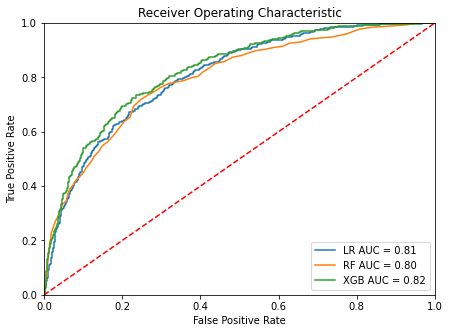

In [46]:
models, fprs, tprs, roc_aucs, classification_reports = compare_models(X_train, y_train, X_val, y_val, models)

plt.figure(figsize=(7,5))
plt.title('Receiver Operating Characteristic')

for fpr, tpr, roc_auc, model in zip(fprs, tprs, roc_aucs, model_names):
    plt.plot(fpr, tpr, label = model+' AUC = %0.2f' % roc_auc)
    
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Observations

1. We plot the ROC curves for different algorithms using default parameters.


2. We cam see that using default parameters, XGBoost has the highest AUC score so we decide to use this model going further.

# Paramater Tuning & Model Validation

Using the XGBoost algorithm, we perform cross validation on the training data set and tune parameters via Grid Search.


The parameters we plan to tune are :
    - min_child_weight
    - gamme
    - subsample
    - colsample_bytree
    - max_depth

In [115]:
# A parameter grid for XGBoost
params = {
    'n_estimators': [100,300,600],
    'learning_rate': [0.1, 0.01],
    'min_child_weight': [5, 10],
    'gamma': [2, 5],
    'colsample_bytree': [0.6, 0.8],
    'max_depth': [3, 5]
        }

In [124]:
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic',
                                   silent=True, 
                                   nthread=1)

In [125]:
folds = 5

strat_cv = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

grid_search = GridSearchCV(xgb_classifier, param_grid=params,
                                   scoring='roc_auc', 
                                   n_jobs=-1, 
                                   cv=strat_cv.split(X,y), 
                                   verbose=3,)

grid_search.fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  8.5min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fe1117cfa50>,
             estimator=XGBClassifier(nthread=1, silent=True), n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8], 'gamma': [2, 5],
                         'learning_rate': [0.1, 0.01], 'max_depth': [5],
                         'min_child_weight': [5, 10],
                         'n_estimators': [100, 300, 600]},
             scoring='roc_auc', verbose=3)

In [126]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 10,
 'n_estimators': 600}

In [49]:
best_params = {'colsample_bytree': 0.8,
 'gamma': 5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 10,
 'n_estimators': 600}

best_params = grid_search.best_params_

In [131]:
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)

model = xgb.XGBClassifier(params=best_params, silent=True)

cv_results = cross_validate(model, X, y, cv=cv, scoring=['roc_auc', 'accuracy', 'f1'])

In [132]:
cv_results

{'fit_time': array([1.25413299, 1.22397804, 1.37660336, 1.29296994, 1.25098133]),
 'score_time': array([0.01708317, 0.01864767, 0.02222085, 0.01624608, 0.02041984]),
 'test_roc_auc': array([0.82015859, 0.8314708 , 0.80367991, 0.83535762, 0.81173655]),
 'test_accuracy': array([0.79424372, 0.81066176, 0.78002451, 0.79534314, 0.77696078]),
 'test_f1': array([0.53203343, 0.57142857, 0.47591241, 0.50297619, 0.47398844])}

We observe that the mean scores for CV are almost around the same value so we can say there model isn't Overfitting too much. Though we can tune regularizaiton parameters more.


- Mean ROCAUC = ~0.82

# Prediction on Test Data

In [47]:
X_test = pd.DataFrame(data=df_test_transformed, columns = categorical_cols+continuous_cols,)

# All the values of TARGET_FLAG are Nans
y_test = pd.DataFrame(data=df_test_transformed, columns = ['INDEX', target],)

In [50]:
# Initialize XGBoost model with best parameters and fit on entire training data
model_xgb = xgb.XGBClassifier(params=best_params, silent=True)
model_xgb.fit(X, y)

XGBClassifier(params={'colsample_bytree': 0.8, 'gamma': 5, 'learning_rate': 0.1,
                      'max_depth': 5, 'min_child_weight': 10,
                      'n_estimators': 600},
              silent=True)

In [51]:
# Predict probabilities as well as raw values for TARGET_FLAG
preds_proba = model_xgb.predict_proba(X_test)
preds_y = model_xgb.predict(X_test)

In [52]:
# Assign predictions to the right index and write to .csv file
y_test[target] = preds_y
y_test.to_csv('predicted_TARGET_FLAG.csv', index=False)

# Model Interpretation

In [53]:
# We first look at the feature importances

feat_imp = pd.DataFrame({'feature':X_test.columns, 'importance':model_xgb.feature_importances_})
feat_imp.sort_values(by='importance', ascending=False)

# We see that the newly created features like PROFESSIONAL_BIN, EDUCATED_BIN,
# seem to be important along with some of the variables URBANICITY, OLDCLAIM etc that we assumed 
# would be from the correlation tests. 
# Also interestingly SEX and RED_CAR do not seem to be very important (like we deduced from the chi2 tests)

,feature,importance
12,PROFESSIONAL_BIN,0.153863
9,URBANICITY,0.081344
30,OLDCLAIM,0.067071
13,HIGHLY_EDUCATED_BIN,0.064709
8,REVOKED,0.057228
0,PARENT1,0.051549
6,CAR_TYPE,0.048400
14,KIDSDRIV_BIN,0.045833
5,CAR_USE,0.044354
25,MVR_PTS,0.042966
